In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes
from collections import Counter

Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [2]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    trees = []
    train_errors = []
    test_errors = []
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        trees.append(tree)
    return trees, train_errors, test_errors

In [15]:
def error_from_n_trees(X_train, X_test, y_train, y_test, n_trees_range, eta=0.1, max_depth = 5):
    last_train_errors = []
    last_test_errors_list = []
    for n_trees in range(*n_trees_range):
        coefs = [1] * n_trees
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
        last_train_errors.append(train_errors[-1])
        last_test_errors_list.append(test_errors[-1])
    return last_train_errors, last_test_errors_list
    
def plot_errors(plot, train_err, test_err, n_trees, depth, title='depth'):
    plot.set_xlabel('n_trees')
    plot.set_ylabel('MSE')
    plot.set_xlim(0, n_trees)
    plot.set_title(f'{title}: {depth}')
    plot.plot(list(range(n_trees)), train_err, label='train error')
    plot.plot(list(range(n_trees)), test_err, label='test error')
    plot.legend(loc='upper right')
    

In [4]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

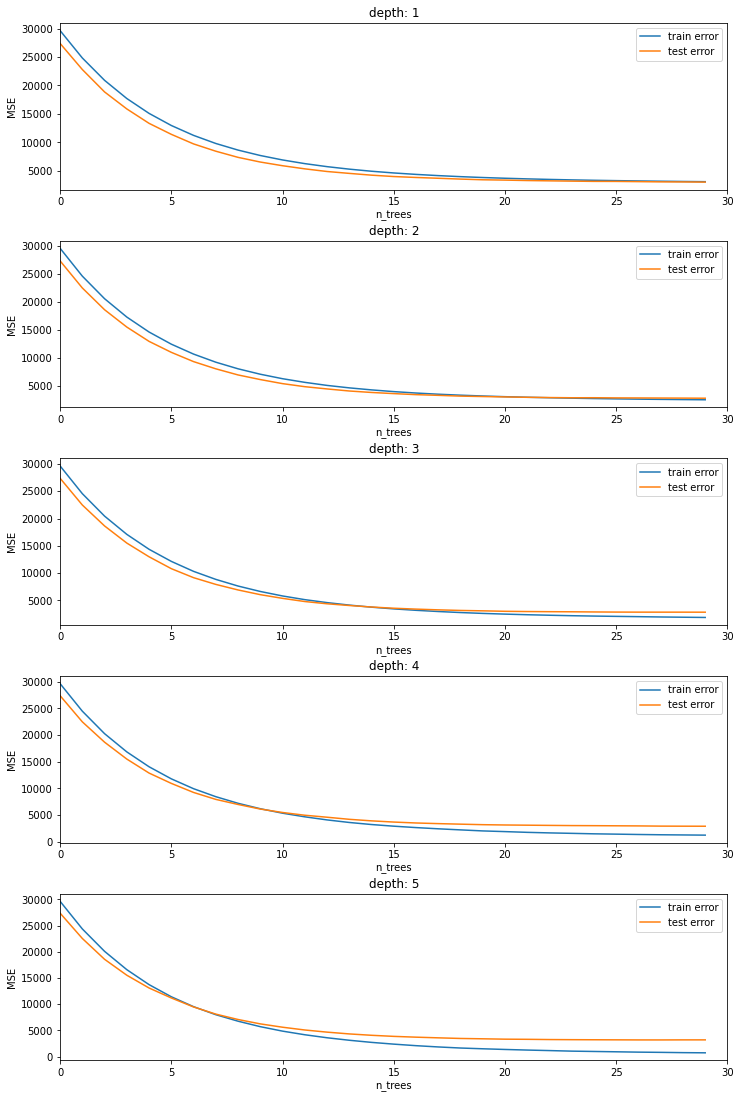

In [5]:
max_depths_range = 5
max_n_trees = 30
fig, axes = plt.subplots(max_depths_range, figsize=(10,15))
fig.tight_layout(h_pad=3)
for axe, max_depth in zip(axes, range(1, max_depths_range + 1)):
    train_err, test_err = error_from_n_trees(X_train, X_test, y_train, y_test, n_trees_range=(1, max_n_trees + 1), max_depth=max_depth)
    plot_errors(axe, train_err, test_err, max_n_trees, max_depth)

* Исходя из анализа графиков, при увеличении количества деревьев, ошибка на трейне снижается до приблизительно постоянной величины, ошибка на тесте, при большом количестве дереьвьев начинает увеличиваться
* При увеличении глубины деревьев модель сильнее переобучается, при приблизительно одинаковой точности.
* Для данный задачи оптимальные значения: количество деревьев=20-30, глубина деревьев=1

Задание 2: (опция) . Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [6]:
def gb_fit_stohastic(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta=0.1, sample=0.5):
    trees = []
    train_errors = []
    test_errors = []
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            sample_size = int(len(X_train)*sample)
            sample_indexes = np.random.choice(len(X_train), sample_size, replace=False)
            target = gb_predict(X_train[sample_indexes], trees, coefs, eta)
            tree.fit(X_train[sample_indexes], bias(y_train[sample_indexes], target))
            
            train_errors.append(mean_squared_error(y_train[sample_indexes], gb_predict(X_train[sample_indexes], trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        trees.append(tree)
    return trees, train_errors, test_errors

In [7]:
def get_error_two_methods_plot(n_trees, first, second, first_name, second_name):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), first, label=first_name)
    plt.plot(list(range(n_trees)), second, label=second_name)
    plt.legend(loc='upper right')
    plt.show()

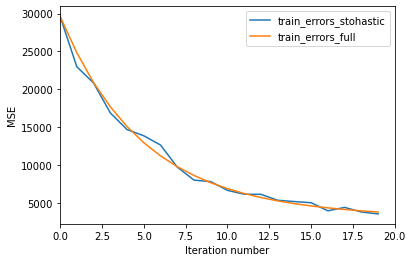

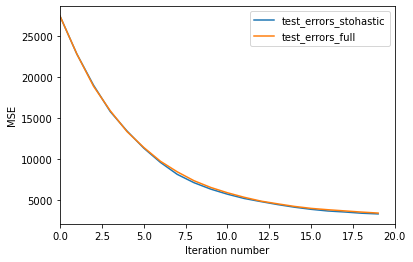

In [8]:
n_trees = 20
max_depth = 1
eta = 0.1
coefs = [1] * n_trees
trees, train_errors1, test_errors1 = gb_fit_stohastic(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
trees, train_errors2, test_errors2 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
get_error_two_methods_plot(n_trees, train_errors1, train_errors2, 'train_errors_stohastic', 'train_errors_full')
get_error_two_methods_plot(n_trees, test_errors1, test_errors2, 'test_errors_stohastic', 'test_errors_full')

По графику видно что кривые практически не отличаются

Задание 3:(опция). Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.

In [9]:
class Node:
    def __init__(self, index, threshold, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.threshold = threshold  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле
        
class Leaf:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        prediction = max(Counter(self.labels))
        return prediction
    
class Tree:
    def __init__(self, min_leaf=5, max_depth=3, max_features=None, random_state=None, criterion='gini'):
        self.root = None
        self.true_branch, self.false_branch = None, None
        
        self.min_leaf = min_leaf
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        if random_state:
            np.random.seed(random_state)
    
    def fit(self, data, labels):
        self.root = self._build(data, labels)
    
    def _build(self, data, labels):
        quality, threshold, index = self._find_best_split(data, labels)
        if quality == 0 or self.max_depth == 0:
            return Leaf(data, labels)

        true_data, false_data, true_labels, false_labels = self._split(data, labels, index, threshold)
        
        self.true_branch = Tree(min_leaf=self.min_leaf, max_depth=self.max_depth - 1)
        self.false_branch = Tree(min_leaf=self.min_leaf, max_depth=self.max_depth - 1)
        self.true_branch.fit(true_data, true_labels)
        self.false_branch.fit(false_data, false_labels)
        return Node(index, threshold, self.true_branch, self.false_branch)
    
    def _find_best_split(self, data, labels):
        current_criterion = 0
        criterion_func = None
        
        if self.criterion == 'gini':
            criterion_func = self._gini
        elif self.criterion == 'entropy':
            criterion_func = self._entropy
        else:
            raise Exception(f'Criterion {self.criterion} not defined')
        
        current_criterion = criterion_func(labels)

        best_quality = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]
        feature_indexes = [i for i in range(n_features)]
        if self.max_features and self.max_features < n_features:
            feature_indexes = np.random.choice(n_features, self.max_features, replace=False)
        
        for index in feature_indexes:
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self._split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < self.min_leaf or len(false_data) < self.min_leaf:
                    continue

                current_quality = self._quality(true_labels, false_labels, current_criterion, criterion_func)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index
    
    def _split(self, data, labels, index, t):
        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)

        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels
    
    def _gini(self, labels):
        classes = Counter(labels)
        impurity = 1
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p ** 2
        return impurity

    def _entropy(self, labels):
        classes = Counter(labels)
        impurity = 0
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p * np.log2(p)
        return impurity
    
    def _quality(self, left_labels, right_labels, current_criterion, criterion_func):
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        return current_criterion - p * criterion_func(left_labels) - (1 - p) * criterion_func(right_labels)


    def classify_object(self, obj):
        if isinstance(self.root, Leaf):
            return self.root.prediction

        if obj[self.root.index] <= self.root.threshold:
            return self.true_branch.classify_object(obj)
        else:
            return self.false_branch.classify_object(obj)
    
    def predict(self, data):
        return [self.classify_object(obj) for obj in data]

    # Напечатаем ход нашего дерева
    def __str__(self, spacing=""):
        output = []
        if isinstance(self.root, Leaf):
            output.append(spacing + f'Прогноз: {self.root.prediction}')
        else:
            output.append(spacing + f'Индекс {self.root.index}')
            output.append(spacing + f'Порог {self.root.threshold}')

            output.append(spacing + '--> True:')
            output.append(spacing + self.true_branch.__str__(spacing='  '))

            output.append(spacing + '--> False:')
            output.append(spacing + self.false_branch.__str__(spacing='  '))
        return '\n'.join(output)


In [10]:
def gb_fit_my_tree(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    trees = []
    train_errors = []
    test_errors = []
    for i in range(n_trees):
        tree = Tree(max_depth=max_depth, random_state=42, criterion='gini')
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        trees.append(tree)
    return trees, train_errors, test_errors

In [11]:
n_trees = 20
max_depth = 1
eta = 0.1
coefs = [1] * n_trees
trees, train_errors1, test_errors1 = gb_fit_my_tree(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
trees, train_errors2, test_errors2 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

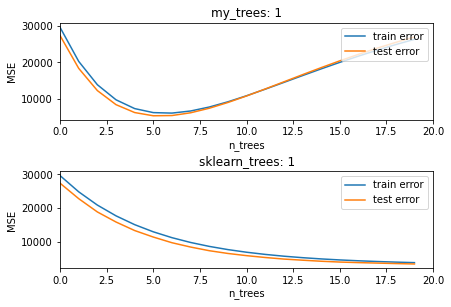

In [17]:
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(h_pad=3)
plot_errors(ax1, train_errors1, test_errors1, n_trees, max_depth, title='my_trees')
plot_errors(ax2, train_errors2, test_errors2, n_trees, max_depth, title='sklearn_trees')